Samriddhi Kapoor

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
#1.Fetch StockData
ticker = "AAPL"
df = yf.download(ticker, start="2023-01-01", end="2024-01-01")
df = df[["Close"]]



/var/folders/yz/1gvzfz3s14399h__p9ysk41h0000gn/T/ipykernel_37278/3881039279.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [3]:
# 2. Feature Engineering
df["MA10"] = df["Close"].rolling(window=10).mean()
df["MA20"] = df["Close"].rolling(window=20).mean()
df["Pct_Change"] = df["Close"].pct_change()
df = df.dropna()

# Features (X) and Target (y)
X = df[["MA10", "MA20", "Pct_Change"]]
y = df["Close"]

In [4]:
# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [5]:
# 4. Train Models
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [6]:
# 5. Evaluation
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE (RF):", mean_absolute_error(y_test, y_pred_rf))
print("R2 (RF):", r2_score(y_test, y_pred_rf))

Linear Regression RMSE: 3.0619752586628484
Random Forest RMSE: 3.338858309651999
MAE (RF): 2.690970958953209
R2 (RF): 0.8508153934323532


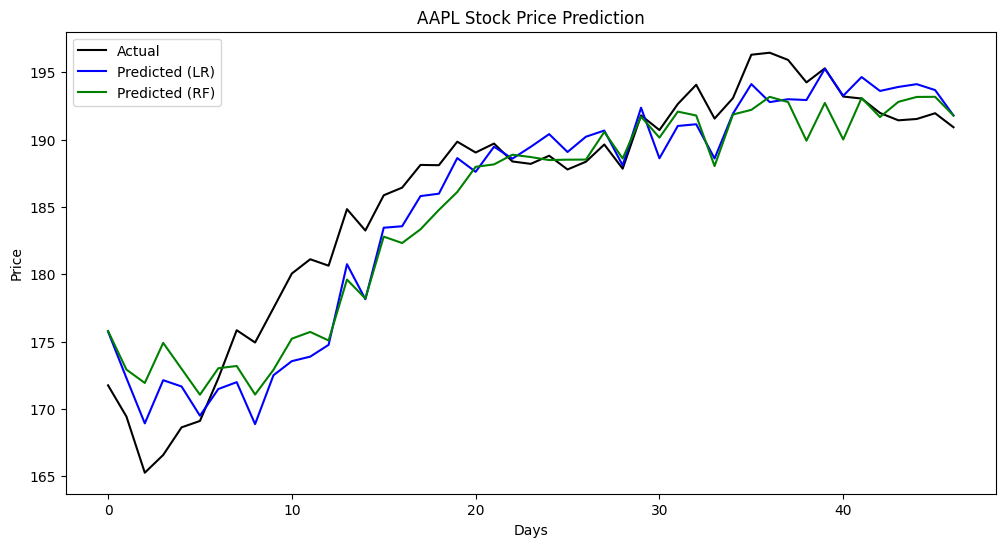

In [7]:
# 6. Visualization
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", color="black")
plt.plot(y_pred, label="Predicted (LR)", color="blue")
plt.plot(y_pred_rf, label="Predicted (RF)", color="green")
plt.legend()
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

In [8]:
# 7. Save Results
actual = np.array(y_test).flatten()
pred_lr = np.array(y_pred).flatten()
pred_rf = np.array(y_pred_rf).flatten()
print("Lengths:", len(actual), len(pred_lr), len(pred_rf))

results = pd.DataFrame({
    "Actual": actual,
    "Predicted_LR": pred_lr,
    "Predicted_RF": pred_rf
})
results.to_csv("stock_predictions.csv", index=False)
print("Results saved to stock_predictions.csv ✔️")

Lengths: 47 47 47
Results saved to stock_predictions.csv ✔️
